# Imports and Loading

In [6]:
!pip install nltk

import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from google.colab import drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading the dataset

In [7]:
df = pd.read_csv(r"/content/drive/MyDrive/AI_Human.csv")

print(df.head())


                                                text  generated
0  Cars. Cars have been around since they became ...        0.0
1  Transportation is a large necessity in most co...        0.0
2  "America's love affair with it's vehicles seem...        0.0
3  How often do you ride in a car? Do you drive a...        0.0
4  Cars are a wonderful thing. They are perhaps o...        0.0


# EDA

Class distribution:
generated
0.0    305797
1.0    181438
Name: count, dtype: int64


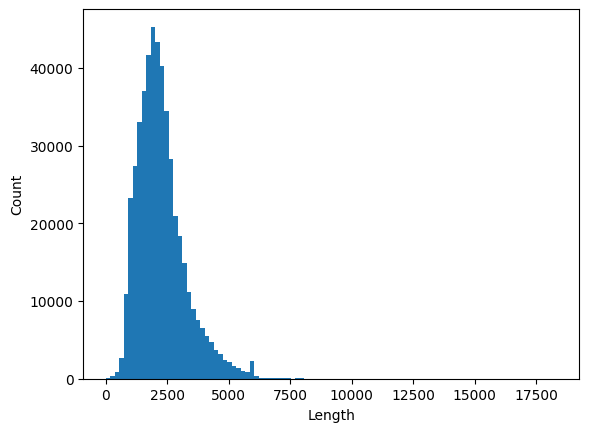

In [8]:
print("Class distribution:")
print(df['generated'].value_counts())

length = df['text'].str.len()
plt.figure()
plt.hist(length, bins=100)
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()


In [9]:
print("Avg length:", length.mean(), "Median length:", length.median())

Avg length: 2269.586591685737 Median length: 2102.0


In [10]:

vectorizer = CountVectorizer()
count   = vectorizer.fit_transform(df['text'])
vocab      = vectorizer.get_feature_names_out()
word_freq  = np.asarray(count.sum(axis=0)).flatten()
top_idx    = word_freq.argsort()[::-1][:20]

print("\nVocabulary size:", len(vocab))
print("Top 20 words:")
for idx in top_idx:
    print(f"  {vocab[idx]}: {word_freq[idx]}")



Vocabulary size: 259050
Top 20 words:
  the: 8798730
  to: 6577811
  and: 5073571
  of: 3975320
  in: 3314216
  that: 3060873
  is: 2735349
  it: 2560144
  for: 2056938
  you: 1971510
  be: 1855493
  they: 1758608
  can: 1646660
  are: 1621389
  have: 1558646
  on: 1405647
  this: 1352763
  not: 1265688
  their: 1200997
  students: 1198790


# Pre-processing the dataset with custom logic

In [11]:
# Preprocessing: lowercase only, whitespace‐tokenize
def preprocess(text: str) -> str:
    # just lowercase—keep punctuation & stopwords
    return text.lower()

# apply to DataFrame
df['preprocessed_text'] = df['text'].apply(preprocess)


vectorizer = TfidfVectorizer(
    max_features=10_000,
    ngram_range=(1,2),
    # this regex keeps any non-whitespace, non-word character as its own token
    token_pattern=r'(?u)\b\w+\b|[^\w\s]'
)

X_tfidf = vectorizer.fit_transform(df['preprocessed_text'])


### Reasoning behind this pre-processing
 Many of the AI generated content are grammatically too accurate with correct usage of punctuations(such as the infamous – in gpt), whereas for human written context we tend to use more stopwords and less punctations in our texts. Therefore, we made a decision to not remove them and use them in training.


# Train-test split and Model Fitting

In [12]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,
    df['generated'].astype(int),
    test_size=0.2,
    stratify=df['generated'],
    random_state=42
)

# Fitting and Evaluation
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Human','AI']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9634673206974047
              precision    recall  f1-score   support

       Human       0.96      0.99      0.97     61159
          AI       0.97      0.93      0.95     36288

    accuracy                           0.96     97447
   macro avg       0.97      0.96      0.96     97447
weighted avg       0.96      0.96      0.96     97447

Confusion Matrix:
 [[60288   871]
 [ 2689 33599]]


# Using the trained model for prediction

In [13]:
#Prediction
def predict(texts, model, vectorizer):
    if isinstance(texts, str):
        texts = [texts]
    cleaned = [t.lower() for t in texts]
    vecs = vectorizer.transform(cleaned)
    preds = model.predict(vecs)
    return ['Human' if p == 0 else 'AI' for p in preds]

# Tests inputs
input = [
    """In the ever-evolving tapestry of global economic systems, capitalism stands as a dominant force shaping the modern world. From the bustling financial hubs of New York and London to the tech-savvy metropolises of Silicon Valley and Bangalore, capitalism has underpinned the dynamic growth of innovation, enterprise, and wealth creation. Critics have long pointed out capitalism's inequalities, but its proponents argue—often convincingly—that no other system has driven as much prosperity, lifted so many out of poverty, and incentivized innovation to the same extent. In today’s interconnected and fast-paced world, capitalism is not only relevant but essential; it acts as a powerful engine for economic growth, individual freedom, technological advancement, and global development.

Understanding Capitalism
Capitalism is an economic system characterized by private ownership of the means of production, profit-driven enterprise, free markets, and minimal government intervention in the economy. Under capitalism, individuals and businesses operate in a competitive environment to offer goods and services that meet consumer demands. The price mechanism—supply and demand—largely determines production and distribution.

Capitalism differs markedly from other economic systems like socialism or communism, where central planning and public ownership of resources dominate. The inherent freedom and decentralization in capitalism allow for greater flexibility, responsiveness to consumer needs, and encouragement of entrepreneurial spirit.

Economic Growth and Wealth Creation
Perhaps capitalism's most visible success is its unmatched ability to generate economic growth. Historically, capitalist nations have experienced faster growth in GDP compared to those that adopted alternative economic models. From the Industrial Revolution to the current digital age, capitalist economies have been at the forefront of technological revolutions and large-scale infrastructure developments.

Take the United States, for example. Its capitalist framework has allowed it to become the largest economy in the world, fostering companies like Apple, Microsoft, Amazon, and Tesla—firms that did not just emerge from innovation but thrived because of competitive market forces and the pursuit of profit. This system has created jobs, increased standards of living, and generated significant tax revenues for public investment in education, healthcare, and infrastructure.

Incentivizing Innovation
Capitalism thrives on competition, and this competition drives innovation. When companies vie for market share, they are compelled to offer better products, more efficient services, and cutting-edge technologies. Innovation is not merely encouraged in capitalism—it is essential for survival.

The tech boom of the 21st century is a direct result of capitalist incentives. Whether it's Google revolutionizing search, Amazon transforming retail logistics, or SpaceX making private space travel feasible, these developments happened not under government mandates but through the drive of private entrepreneurs seeking to solve problems—and profit in the process.

Moreover, capitalism creates a feedback loop: as consumers reward the best innovations with their spending, it provides market validation and capital to further develop and refine technologies. This self-sustaining loop has made.""",
    "I believe capatalism is kinda wrong because you know with all that happening in this world. I mean who would have guessed, that communism is making a comeback. Let me rephrase that, not communism, socialist democracy is making a comeback."

]

#  Predictions using the model
result = predict(input, nb, vectorizer)

# Results
for text, label in zip(input, result):
    print(f"\nText:\n{text}\nPrediction: {label}")










Text:
In the ever-evolving tapestry of global economic systems, capitalism stands as a dominant force shaping the modern world. From the bustling financial hubs of New York and London to the tech-savvy metropolises of Silicon Valley and Bangalore, capitalism has underpinned the dynamic growth of innovation, enterprise, and wealth creation. Critics have long pointed out capitalism's inequalities, but its proponents argue—often convincingly—that no other system has driven as much prosperity, lifted so many out of poverty, and incentivized innovation to the same extent. In today’s interconnected and fast-paced world, capitalism is not only relevant but essential; it acts as a powerful engine for economic growth, individual freedom, technological advancement, and global development.

Understanding Capitalism
Capitalism is an economic system characterized by private ownership of the means of production, profit-driven enterprise, free markets, and minimal government intervention in the econ

# Loading the model and testing it for verification

In [14]:
import pickle

model = {
    'model': nb,
    'vectorizer': vectorizer
}

save_path = '/content/drive/MyDrive/nbAihuman.pkl'

with open(save_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Model saved to {save_path}")


Model saved to /content/drive/MyDrive/nbAihuman.pkl


In [16]:
# Inference function
def predict(texts, model, vectorizer):
    if isinstance(texts, str):
        texts = [texts]
    cleaned = [t.lower() for t in texts]  # pre-processing
    vecs = vectorizer.transform(cleaned)
    preds = model.predict(vecs)
    return ['Human' if p == 0 else 'AI' for p in preds]


input = [
    "This is a great model.",
    "I dont vibe with these weirdos"
]

# Prediction
results = predict(input, nb, vectorizer)

# Result
for text, label in zip(input, results):
    print(f"\nText:\n{text}\nPrediction: {label}")



Text:
This is a great model.
Prediction: Human

Text:
I dont vibe with these weirdos
Prediction: Human
